In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
######################   Markit CDS data ##############################

PATH = "inputs/MKT_data"

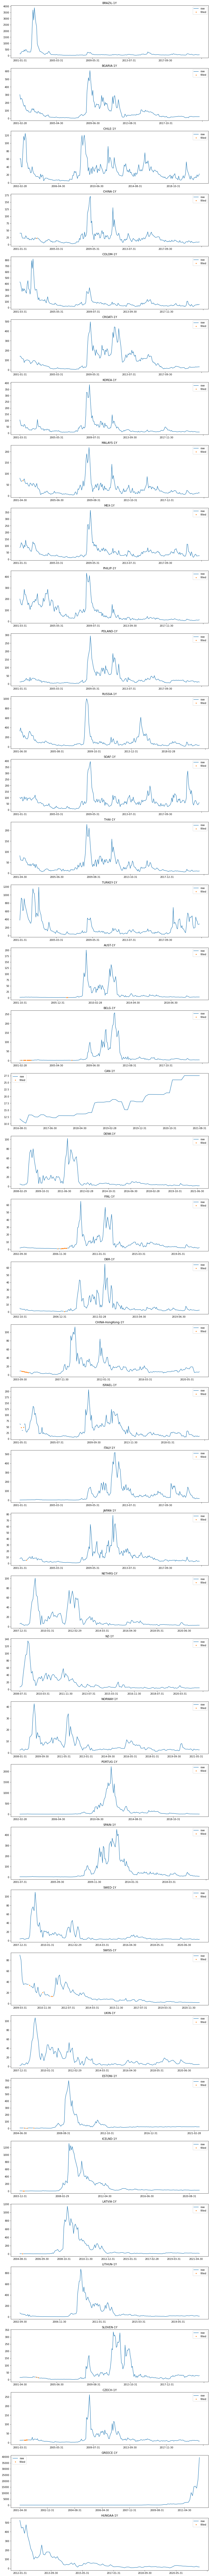

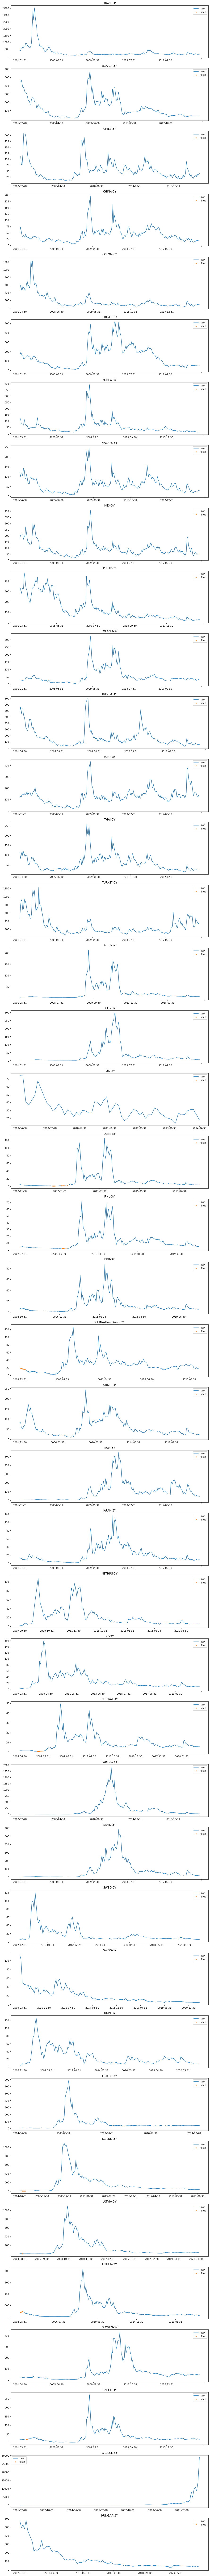

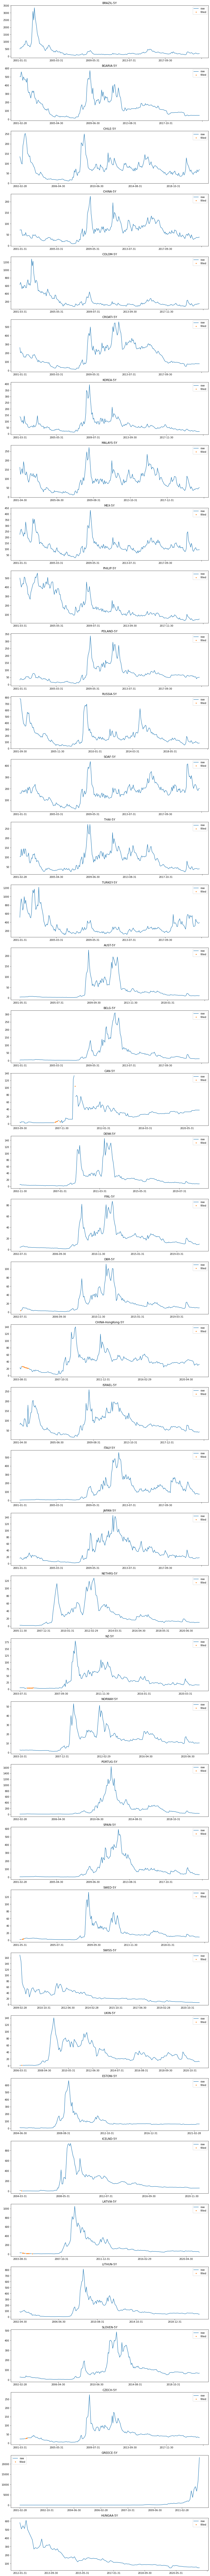

In [113]:
tenors = ["1Y", "3Y", "5Y"]


for tenor in tenors:    
    df = pd.read_csv(f"{PATH}/CDS{tenor}.csv")
    df = df.set_index('Date')

    raw_df = pd.read_csv(f"{PATH}/raw/CDS{tenor}.csv")
    raw_df = raw_df.set_index('Date')

    fig, axes = plt.subplots(len(df.columns), 1, figsize=(15,200))

    for i, col in enumerate(df.columns):

        country_df = df[col].dropna()
        raw_country_df = raw_df[col].loc[country_df.index[0]:country_df.index[-1]]

        res = pd.DataFrame(index=country_df.index)
        res['raw'] = raw_country_df.values
        res['filled'] = country_df[raw_country_df.isna()]

        res.plot(y='raw', ax=axes[i], use_index=True, title=f"{col}-{tenor}", xlabel="", legend=True, style='-')
        res.plot(y='filled', ax=axes[i], use_index=True, title=f"{col}-{tenor}", xlabel="", legend=True, style='.')



In [39]:
import main

In [43]:
res_list = list()
for i, country in enumerate(df.columns):
    _, _, _, PFILE, _, t0, t1 = main.find_overlap(ICAR_1=i, DATA_V="MKT_data")
    res_list.append([f"{t0.year}-{t0.month}-{t0.day}", f"{t1.year}-{t1.month}-{t1.day}", len(PFILE.loc[t0:t1])])

pd.DataFrame(index=df.columns, columns=['start', 'end', '# obs'], data=res_list).reset_index()

index       start        end  # obs
0           BRAZIL    2001-7-1   2021-7-1    241
1           BGARIA    2001-7-1   2021-7-1    241
2            CHILE   2002-2-28   2021-7-1    233
3            CHINA    2001-7-1   2021-7-1    241
4            COLOM    2001-7-1   2021-7-1    241
5           CROATI    2001-7-1   2021-7-1    241
6            KOREA    2001-7-1   2021-7-1    241
7           MALAYS    2001-7-1   2021-7-1    241
8              MEX    2001-7-1   2021-7-1    241
9           PHILIP    2001-7-1   2021-7-1    241
10          POLAND    2001-7-1   2021-7-1    241
11          RUSSIA   2001-9-30   2021-7-1    238
12            SOAF    2001-7-1   2021-7-1    241
13            THAI    2001-7-1   2021-7-1    241
14          TURKEY    2001-7-1   2021-7-1    241
15            AUST  2001-10-31   2021-7-1    237
16            BELG    2001-7-1   2021-7-1    241
17             CAN   2016-8-31  2014-4-30      0
18            DENK   2008-2-29   2021-7-1    161
19            FINL   2002-9-30   2021-7-1    226
20             DBR  2002-10-31   2021-7-1    225
21  CHINA-HongKong  2003-12-31   2021-7-1    211
22          ISRAEL  2001-11-30   2021-7-1    236
23           ITALY    2001-7-1   2021-7-1    241
24           JAPAN    2001-7-1   2021-7-1    241
25          NETHRS  2007-12-31   2021-7-1    163
26              NZ   2008-7-31   2021-7-1    156
27          NORWAY   2008-1-31   2021-7-1    162
28          PORTUG   2002-2-28   2021-7-1    233
29           SPAIN   2001-7-31   2021-7-1    240
30            SWED  2007-12-31   2021-7-1    163
31           SWISS   2009-3-31   2021-7-1    148
32            UKIN  2007-12-31   2021-7-1    163
33          ESTONI   2004-6-30   2021-7-1    205
34          ICELND  2004-10-31   2021-7-1    201
35          LATVIA   2004-8-31   2021-7-1    203
36          LITHUN   2002-9-30   2021-7-1    226
37          SLOVEN   2002-2-28   2021-7-1    233
38           CZECH    2001-7-1   2021-7-1    241
39          GREECE    2001-7-1  2012-3-31    129
40          HUNGAA   2012-1-31   2021-7-1    114